Σύγκλιση επιτεύχθηκε μετά από 1375 επαναλήψεις.


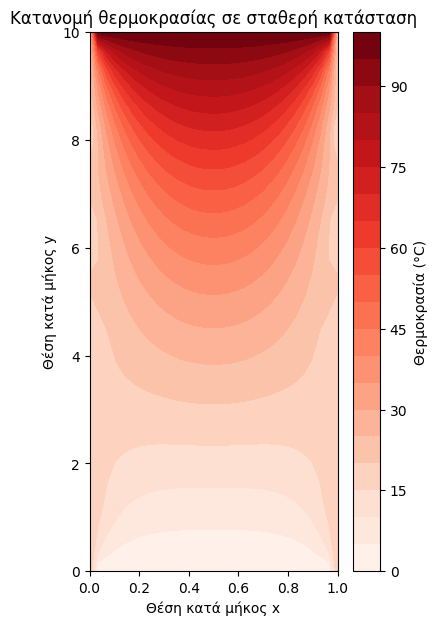

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ορισμός παραμέτρων
Lx = 1.0  # μήκος ράβδου κατά μήκος x
Ly = 1.0  # μήκος ράβδου κατά μήκος y
Nx = 30  # αριθμός διακριτών σημείων κατά μήκος x
Ny = 30  # αριθμός διακριτών σημείων κατά μήκος y
T0 = 100.0  # θερμοκρασία στο αριστερό άκρο (x=0)
TL = 0.0  # θερμοκρασία στο δεξί άκρο (x=Lx)
T_side = 20.0  # θερμοκρασία στα πλάγια (y=0 και y=Ly)
T_heat = 15.0  # θερμοκρασία των πηγών θερμότητας
heat_positions = [0.2, 0.4, 0.6, 0.8]  # θέσεις των πηγών θερμότητας στον άξονα y
heat_thickness = 0.05  # πάχος των πηγών θερμότητας

# Διάστημα διακριτοποίησης
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)

# Αρχικοποίηση πίνακα θερμοκρασιών
T = np.zeros((Nx, Ny))

# Συνθήκες ορίου
T[:, 0] = T0  # αριστερό άκρο (x=0)
T[:, -1] = TL  # δεξί άκρο (x=Lx)
T[0, :] = T_side  # κάτω άκρο (y=0)
T[-1, :] = T_side  # πάνω άκρο (y=Ly)

# Εφαρμογή θερμοκρασίας στις πηγές θερμότητας
for y_pos in heat_positions:
    j_start = int((y_pos - heat_thickness / 2) / dy)
    j_end = int((y_pos + heat_thickness / 2) / dy)
    T[0, j_start:j_end + 1] = T_heat  # κάτω άκρο (y=0)
    T[-1, j_start:j_end + 1] = T_heat  # πάνω άκρο (y=Ly)

# Επαναληπτική μέθοδος για την επίλυση του συστήματος
tolerance = 1e-4
max_iterations = 10000
for iteration in range(max_iterations):
    T_old = T.copy()
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            T[i, j] = 0.5 * ((T_old[i+1, j] + T_old[i-1, j]) / dx**2 +
                             (T_old[i, j+1] + T_old[i, j-1]) / dy**2) / (1/dx**2 + 1/dy**2)

    # Έλεγχος για σύγκλιση
    if np.max(np.abs(T - T_old)) < tolerance:
        print(f"Σύγκλιση επιτεύχθηκε μετά από {iteration+1} επαναλήψεις.")
        break
else:
    print("Η μέθοδος δεν συγκλίνει.")

# Σχεδίαση του αποτελέσματος
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, 10, Ny)  # Προσαρμογή του εύρους του άξονα y από 0 έως 10
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(4, 7))
plt.contourf(X, Y, np.flipud(T.T), 20, cmap='Reds')  # Ανάποδη ράβδος και κόκκινη χρωματική κλίμακα
plt.colorbar(label='Θερμοκρασία (°C)')
plt.xlabel('Θέση κατά μήκος x')
plt.ylabel('Θέση κατά μήκος y')
plt.title('Κατανομή θερμοκρασίας σε σταθερή κατάσταση')
plt.ylim(0, 10)
plt.show()
